<a href="https://colab.research.google.com/github/roneshpra/PythonLearning/blob/Dev/PythonBasics/M3W4_Project_EasyVisa_Final_RB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Problem Statement

### Business Context

Business communities in the United States are facing high demand for human resources, but one of the constant challenges is identifying and attracting the right talent, which is perhaps the most important element in remaining competitive. Companies in the United States look for hard-working, talented, and qualified individuals both locally as well as abroad.

The Immigration and Nationality Act (INA) of the US permits foreign workers to come to the United States to work on either a temporary or permanent basis. The act also protects US workers against adverse impacts on their wages or working conditions by ensuring US employers' compliance with statutory requirements when they hire foreign workers to fill workforce shortages. The immigration programs are administered by the Office of Foreign Labor Certification (OFLC).

OFLC processes job certification applications for employers seeking to bring foreign workers into the United States and grants certifications in those cases where employers can demonstrate that there are not sufficient US workers available to perform the work at wages that meet or exceed the wage paid for the occupation in the area of intended employment.

### Objective

In FY 2016, the OFLC processed 775,979 employer applications for 1,699,957 positions for temporary and permanent labor certifications. This was a nine percent increase in the overall number of processed applications from the previous year. The process of reviewing every case is becoming a tedious task as the number of applicants is increasing every year.

The increasing number of applicants every year calls for a Machine Learning based solution that can help in shortlisting the candidates having higher chances of VISA approval. OFLC has hired the firm EasyVisa for data-driven solutions. You as a data  scientist at EasyVisa have to analyze the data provided and, with the help of a classification model:

* Facilitate the process of visa approvals.
* Recommend a suitable profile for the applicants for whom the visa should be certified or denied based on the drivers that significantly influence the case status.

### Data Description

The data contains the different attributes of employee and the employer. The detailed data dictionary is given below.

* case_id: ID of each visa application
* continent: Information of continent the employee
* education_of_employee: Information of education of the employee
* has_job_experience: Does the employee has any job experience? Y= Yes; N = No
* requires_job_training: Does the employee require any job training? Y = Yes; N = No
* no_of_employees: Number of employees in the employer's company
* yr_of_estab: Year in which the employer's company was established
* region_of_employment: Information of foreign worker's intended region of employment in the US.
* prevailing_wage:  Average wage paid to similarly employed workers in a specific occupation in the area of intended employment. The purpose of the prevailing wage is to ensure that the foreign worker is not underpaid compared to other workers offering the same or similar service in the same area of employment.
* unit_of_wage: Unit of prevailing wage. Values include Hourly, Weekly, Monthly, and Yearly.
* full_time_position: Is the position of work full-time? Y = Full Time Position; N = Part Time Position
* case_status:  Flag indicating if the Visa was certified or denied

## Installing and Importing the necessary libraries

In [1]:
# Installing the libraries with the specified version.
!pip install numpy==1.25.2 pandas==1.5.3 scikit-learn==1.5.2 matplotlib==3.7.1 seaborn==0.13.1 xgboost==2.0.3 -q --user

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.2/18.2 MB 39.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.0/12.0 MB 58.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.3/13.3 MB 61.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 63.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.8/294.8 kB 17.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 297.1/297.1 MB 4.3 MB/s eta 0:00:00
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires pandas==2.2.2, but you have pandas 1.5.3 which is incompatible.
umap-learn 0.5.9.post2 requires scikit-learn>=1.6, but you have scikit-learn 1.5.2 which is incompatible.
blosc2 3.5.1 requires numpy>=1.26,

**Note**: *After running the above cell, kindly restart the notebook kernel and run all cells sequentially from the below.*

In [2]:
# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Library to split data
from sklearn.model_selection import train_test_split

# To oversample and undersample data
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score


# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 100)


# Libraries different ensemble classifiers
from sklearn.ensemble import (
    BaggingClassifier,
    RandomForestClassifier,
    AdaBoostClassifier,
    GradientBoostingClassifier
)

from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier

# Libraries to get different metric scores
from sklearn import metrics
from sklearn.metrics import (
    confusion_matrix,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
)

# To tune different models
from sklearn.model_selection import RandomizedSearchCV

# To ignore unnecessary warnings
import warnings
warnings.filterwarnings("ignore")

## Import Dataset

In [3]:
# uncomment the below lines if Google Colab is being used
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# loading data into a pandas dataframe
visa_data = pd.read_csv("/content/drive/MyDrive/EasyVisa.csv")

In [5]:
# creating a copy of the dataset
data = visa_data.copy()

## Overview of the Dataset

#### View the first and last 5 rows of the dataset

In [6]:
# viewing the first 5 rows of the dataset
data.head(5)

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified


In [7]:
# viewing the last 5 rows of the dataset
data.tail(5)

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
25475,EZYV25476,Asia,Bachelor's,Y,Y,2601,2008,South,77092.57,Year,Y,Certified
25476,EZYV25477,Asia,High School,Y,N,3274,2006,Northeast,279174.79,Year,Y,Certified
25477,EZYV25478,Asia,Master's,Y,N,1121,1910,South,146298.85,Year,N,Certified
25478,EZYV25479,Asia,Master's,Y,Y,1918,1887,West,86154.77,Year,Y,Certified
25479,EZYV25480,Asia,Bachelor's,Y,N,3195,1960,Midwest,70876.91,Year,Y,Certified


#### Understand the shape of the dataset

In [8]:
# checking the shape of the data
data.shape

(25480, 12)

#### Observations:


*   The dataset has 25480 rows and 12 columns



#### Check the data types of the columns for the dataset

In [9]:
# checking the data types of the columns of the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25480 entries, 0 to 25479
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   case_id                25480 non-null  object 
 1   continent              25480 non-null  object 
 2   education_of_employee  25480 non-null  object 
 3   has_job_experience     25480 non-null  object 
 4   requires_job_training  25480 non-null  object 
 5   no_of_employees        25480 non-null  int64  
 6   yr_of_estab            25480 non-null  int64  
 7   region_of_employment   25480 non-null  object 
 8   prevailing_wage        25480 non-null  float64
 9   unit_of_wage           25480 non-null  object 
 10  full_time_position     25480 non-null  object 
 11  case_status            25480 non-null  object 
dtypes: float64(1), int64(2), object(9)
memory usage: 2.3+ MB


#### Observations:


*   There are 3 columns of the dataset that are numerical (2 of type integer and 1 of type float)
*   There are 9 columns of the object type



## Exploratory Data Analysis (EDA)

#### Let's check the statistical summary of the data

In [10]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
no_of_employees,25480.0,5667.043210,22877.928848,-26.0000,1022.00,2109.00,3504.0000,602069.00
yr_of_estab,25480.0,1979.409929,42.366929,1800.0000,1976.00,1997.00,2005.0000,2016.00
prevailing_wage,25480.0,74455.814592,52815.942327,2.1367,34015.48,70308.21,107735.5125,319210.27


#### Checing for duplicate values in the dataset

In [11]:
# checking for duplicate values
data.duplicated().sum()

np.int64(0)

#### Observations:


*   There are no duplicate values in the dataset

#### Checking for missing values

In [12]:
data.isnull().sum()

,0
case_id,0
continent,0
education_of_employee,0
has_job_experience,0
requires_job_training,0
no_of_employees,0
yr_of_estab,0
region_of_employment,0
prevailing_wage,0
unit_of_wage,0


#### Observations:


*   There are no missing values



#### Fixing the negative values in number of employees columns

In [13]:
# get the number of unique values for no_of_employees
data['no_of_employees'].nunique()

7105

In [14]:
# checking for negative values
data[data["no_of_employees"] < 0]["no_of_employees"]

,no_of_employees
245,-25
378,-11
832,-17
2918,-26
6439,-14
6634,-26
7224,-25
7281,-14
7318,-26
7761,-11


In [15]:
data.loc[data["no_of_employees"] < 0, "no_of_employees"].shape

(33,)



*   There are 33 rows with negative values for number of employees



In [16]:
# replacing the negative values for no_of_employees into absolute values
data["no_of_employees"] = data["no_of_employees"].abs()

In [17]:
# verifying if the negative values are replaced with absolute values
data[data["no_of_employees"] < 0]["no_of_employees"].shape

(0,)



*  All the negative rows for column 'no_of_employees' have been replaced with absolute values



#### Let's check the count of each unique category in each of the categorical variables

In [18]:
# Making a list of all categorical variables
cat_col = list(data.select_dtypes("object").columns)

# Printing number of count of each unique value in each column
for column in cat_col:
    print(data[column].value_counts())
    print("-" * 50)

case_id
EZYV25480    1
EZYV01       1
EZYV02       1
EZYV03       1
EZYV04       1
            ..
EZYV13       1
EZYV12       1
EZYV11       1
EZYV10       1
EZYV09       1
Name: count, Length: 25480, dtype: int64
--------------------------------------------------
continent
Asia             16861
Europe            3732
North America     3292
South America      852
Africa             551
Oceania            192
Name: count, dtype: int64
--------------------------------------------------
education_of_employee
Bachelor's     10234
Master's        9634
High School     3420
Doctorate       2192
Name: count, dtype: int64
--------------------------------------------------
has_job_experience
Y    14802
N    10678
Name: count, dtype: int64
--------------------------------------------------
requires_job_training
N    22525
Y     2955
Name: count, dtype: int64
--------------------------------------------------
region_of_employment
Northeast    7195
South        7017
West         6586
Midwest      

In [19]:
# checking the number of unique values for case_id
data["case_id"].nunique()

25480



*   Case ID is unique for each row so it will not add any value to the modelling, hence, we can drop the column



In [20]:
# dropping case_id column since it does not add much value
data.drop("case_id", axis=1, inplace=True)

In [21]:
# changing the object data types to category
cols_category = data.select_dtypes("object").columns
data[cols_category] = data[cols_category].astype("category")

In [22]:
# checking the datatypes of the columns after conversion to category type
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25480 entries, 0 to 25479
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   continent              25480 non-null  category
 1   education_of_employee  25480 non-null  category
 2   has_job_experience     25480 non-null  category
 3   requires_job_training  25480 non-null  category
 4   no_of_employees        25480 non-null  int64   
 5   yr_of_estab            25480 non-null  int64   
 6   region_of_employment   25480 non-null  category
 7   prevailing_wage        25480 non-null  float64 
 8   unit_of_wage           25480 non-null  category
 9   full_time_position     25480 non-null  category
 10  case_status            25480 non-null  category
dtypes: category(8), float64(1), int64(2)
memory usage: 797.7 KB


In [23]:
# checking the unique values for category datatypes
cat_col = list(data.select_dtypes("category").columns)

# Printing number of count of each unique value in each column
for column in cat_col:
    print(data[column].value_counts())
    print("-" * 50)

continent
Asia             16861
Europe            3732
North America     3292
South America      852
Africa             551
Oceania            192
Name: count, dtype: int64
--------------------------------------------------
education_of_employee
Bachelor's     10234
Master's        9634
High School     3420
Doctorate       2192
Name: count, dtype: int64
--------------------------------------------------
has_job_experience
Y    14802
N    10678
Name: count, dtype: int64
--------------------------------------------------
requires_job_training
N    22525
Y     2955
Name: count, dtype: int64
--------------------------------------------------
region_of_employment
Northeast    7195
South        7017
West         6586
Midwest      4307
Island        375
Name: count, dtype: int64
--------------------------------------------------
unit_of_wage
Year     22962
Hour      2157
Week       272
Month       89
Name: count, dtype: int64
--------------------------------------------------
full_time_posit

### Univariate Analysis

In [24]:
def histogram_boxplot(data, feature, figsize=(15, 10), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (15,10))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a triangle will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [25]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

#### Observations on education of employee

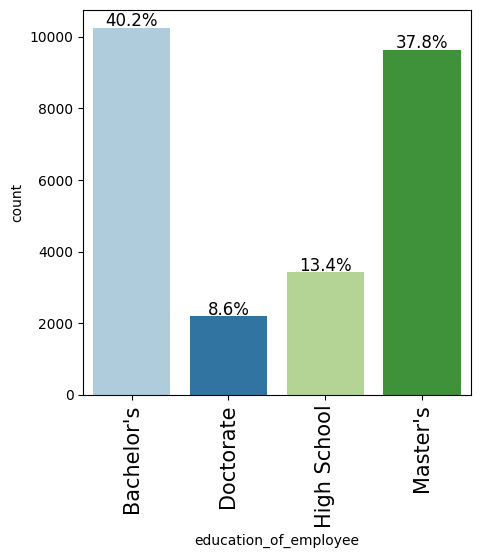

In [26]:
labeled_barplot(data, "education_of_employee", perc=True)

#### Observations:


*   Majority of the applicants have Bachelor's degree followed by Master's



#### Observations on region of employment

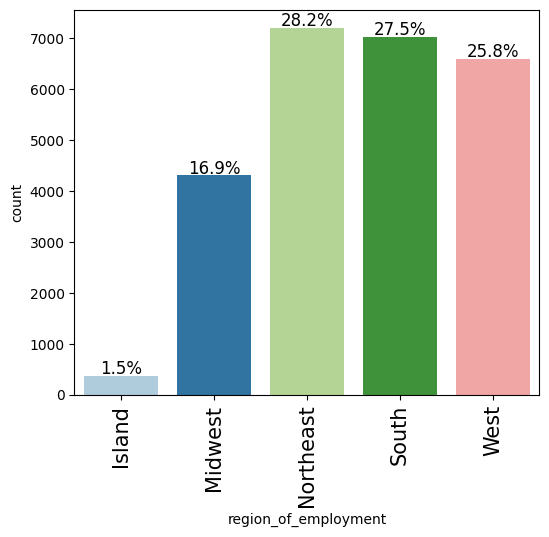

In [27]:
labeled_barplot(data, "region_of_employment", perc=True)

#### Observations:


*   Most of the applications are for the Northeast region followed by South and West region
*   The region Island has the least number of applications



#### Observations on job experience

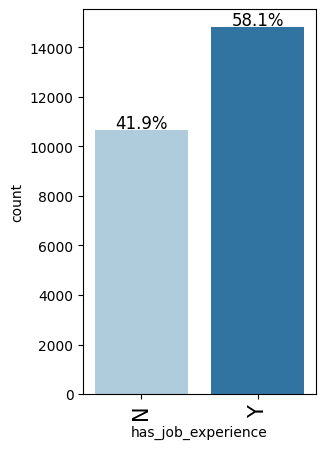

In [28]:
labeled_barplot(data, "has_job_experience", perc=True)

#### Observations:


*   58 % of the applicants have the job experience while 42 % do not



#### Observations on case status

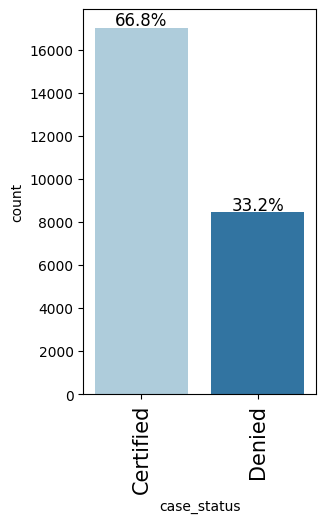

In [29]:
labeled_barplot(data, "case_status", perc=True)

#### Observations:


*   Almost 67 % of the applications are certified while 33 % are denied



### Bivariate Analysis

Checking Correlation

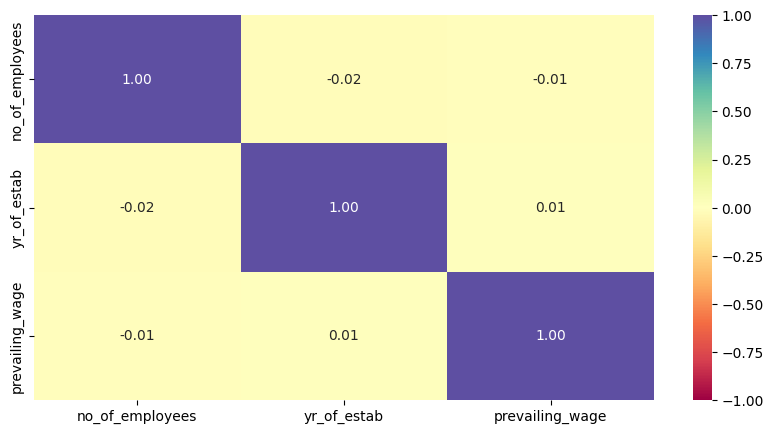

In [30]:
cols_list = data.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(10, 5))
sns.heatmap(
    data[cols_list].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral"
)
plt.show()



*   The numeric columns are weakly correlated



**Creating functions that will help us with further analysis.**

In [31]:
### function to plot distributions wrt target


def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
        stat="density",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
        stat="density",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

In [32]:
def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 5, 5))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

#### Does higher education increase the chances of visa certification for well-paid jobs abroad?

case_status            Certified  Denied    All
education_of_employee                          
All                        17018    8462  25480
Bachelor's                  6367    3867  10234
High School                 1164    2256   3420
Master's                    7575    2059   9634
Doctorate                   1912     280   2192
------------------------------------------------------------------------------------------------------------------------


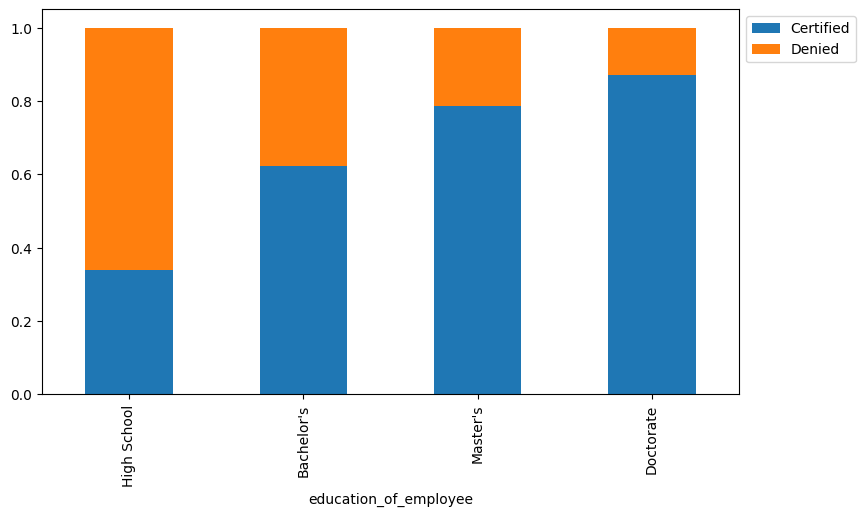

In [33]:
stacked_barplot(data, "education_of_employee", "case_status")

#### Observations:


*   Applicants with higher education is more likely to get certified
*   Applicants with education level of High School has the highest denial rate followed by Bachelor's



#### How does visa status vary across different continents?

case_status    Certified  Denied    All
continent                              
All                17018    8462  25480
Asia               11012    5849  16861
North America       2037    1255   3292
Europe              2957     775   3732
South America        493     359    852
Africa               397     154    551
Oceania              122      70    192
------------------------------------------------------------------------------------------------------------------------


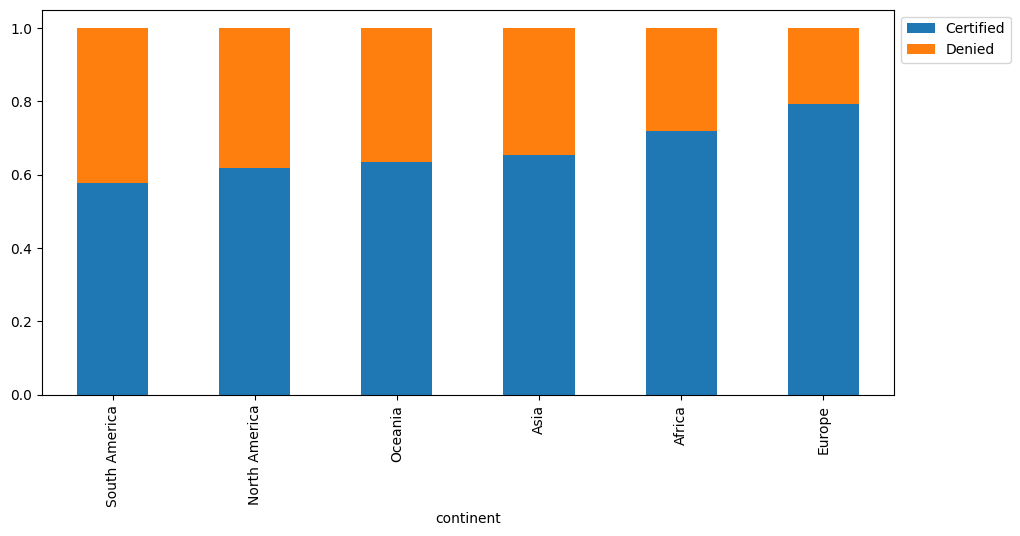

In [34]:
stacked_barplot(data, "continent", "case_status")

#### Observations:


*   Applicants from Europe and Africa are more likely to be certified
*   Applicants from South America and North America have the most denials



#### Does having prior work experience influence the chances of visa certification for career opportunities abroad?

case_status         Certified  Denied    All
has_job_experience                          
All                     17018    8462  25480
N                        5994    4684  10678
Y                       11024    3778  14802
------------------------------------------------------------------------------------------------------------------------


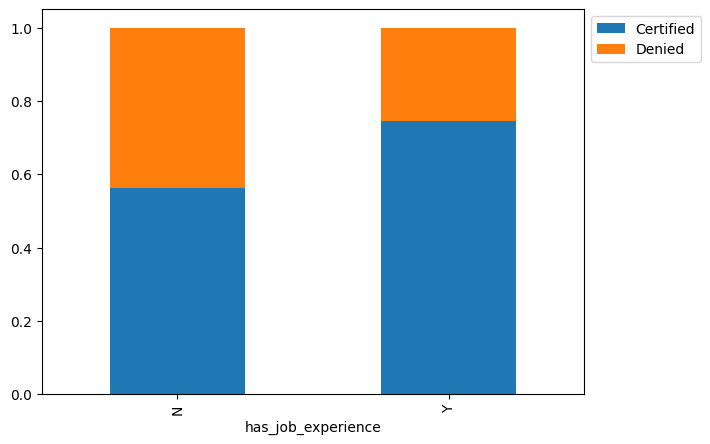

In [37]:
stacked_barplot(data, "has_job_experience", "case_status")

#### Observations:


*   Applicants who have prior job experience are more likely to be certified



#### Is the prevailing wage consistent across all regions of the US?

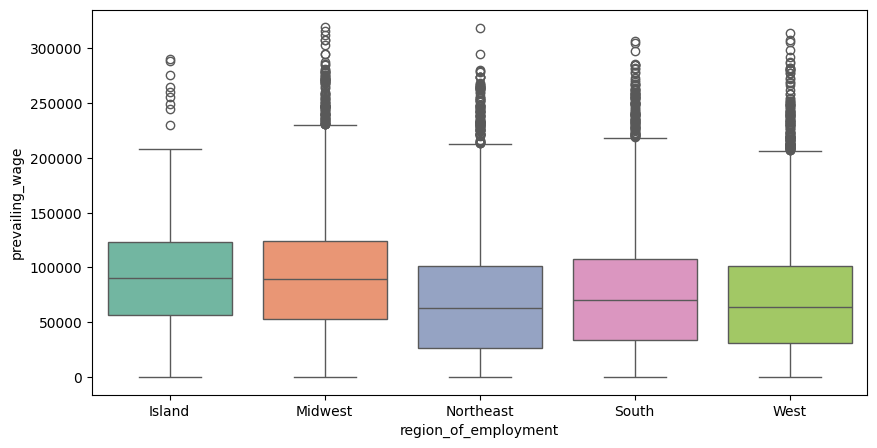

In [38]:
plt.figure(figsize=(10, 5))
sns.boxplot(data=data, x="region_of_employment", y="prevailing_wage", palette="Set2")
plt.show()

#### Observations:


*   The average prevailing wages are higher for Island and Midwest regions
*   The average prevailing wages for Northeast region is the lowest



#### Does visa status vary with changes in the prevailing wage set to protect both local talent and foreign workers?

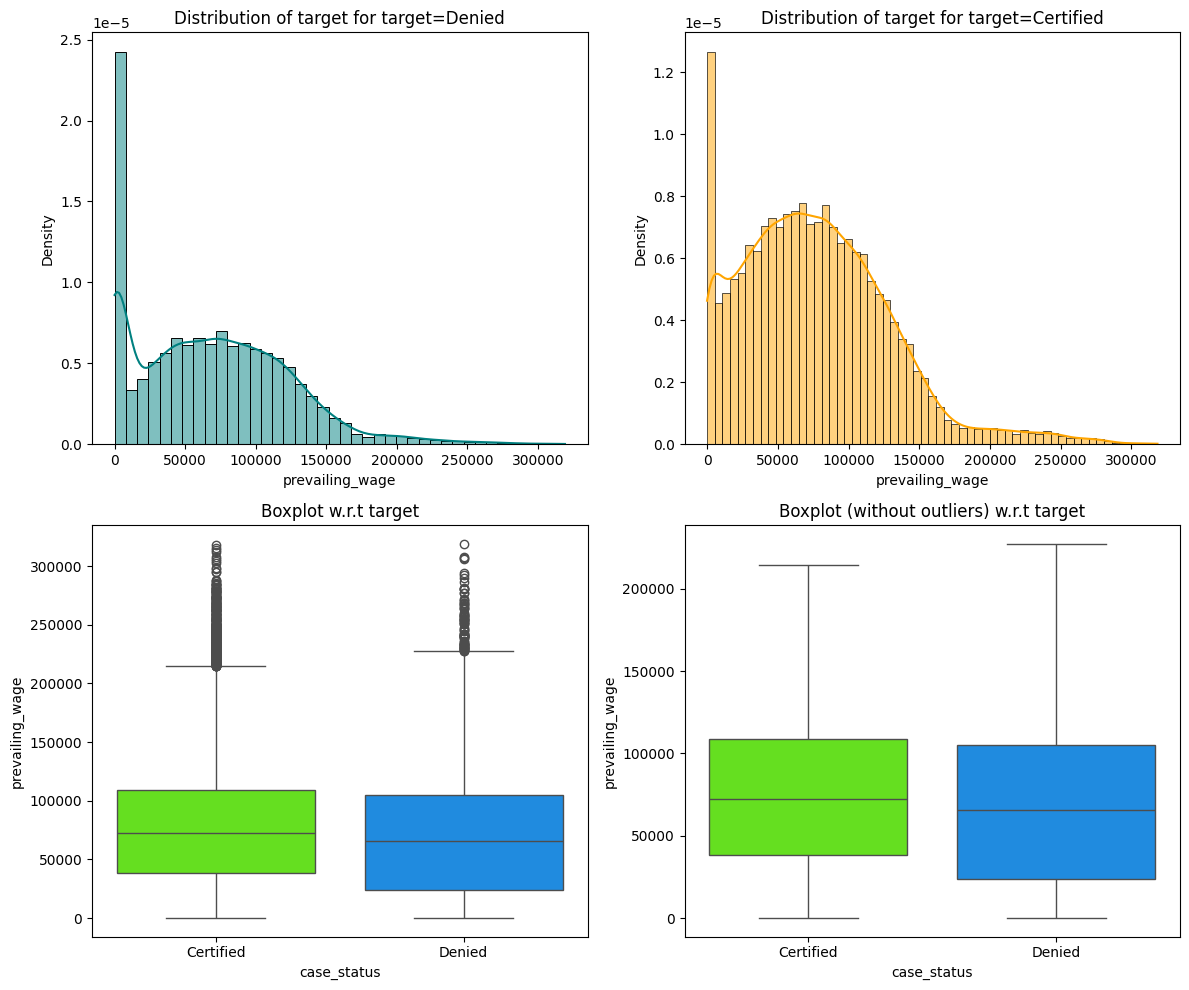

In [39]:
distribution_plot_wrt_target(data, "prevailing_wage", "case_status")

#### Observations:


*   The prevailing wages for certified applicants are higher

#### Does the unit of prevailing wage (Hourly, Weekly, etc.) have any impact on the likelihood of visa application certification?

case_status   Certified  Denied    All
unit_of_wage                          
All               17018    8462  25480
Year              16047    6915  22962
Hour                747    1410   2157
Week                169     103    272
Month                55      34     89
------------------------------------------------------------------------------------------------------------------------


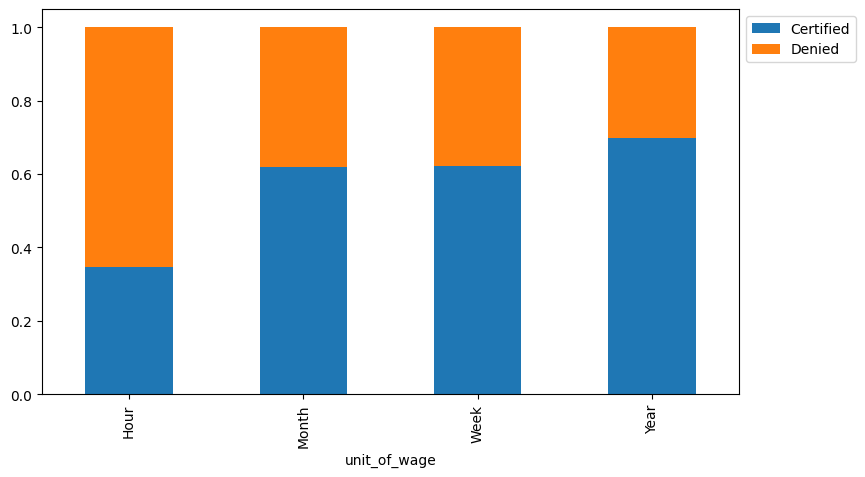

In [41]:
stacked_barplot(data, "unit_of_wage", "case_status")

#### Observations:


*   Applicants whose unit of wage is yearly have the highest rate of being certified
*   Applicants whose unit of wage is hourly have highest denial rate



## Data Pre-processing

### Outlier Check

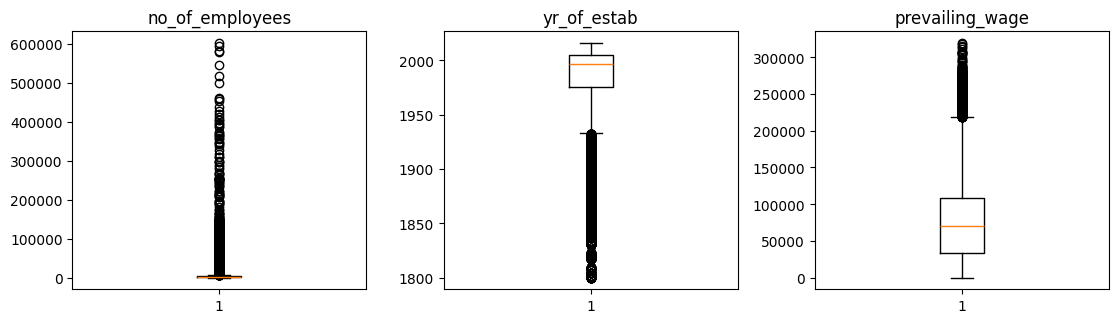

In [42]:
# outlier detection using boxplot
numeric_columns = data.select_dtypes(include=np.number).columns.tolist()


plt.figure(figsize=(15, 12))

for i, variable in enumerate(numeric_columns):
    plt.subplot(4, 4, i + 1)
    plt.boxplot(data[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()



*   There are lot of outliers in the dataset



### Data Preparation for modeling

## Model Building

### Model Evaluation Criterion

- Choose the primary metric to evaluate the model on
- Elaborate on the rationale behind choosing the metric

First, let's create functions to calculate different metrics and confusion matrix so that we don't have to use the same code repeatedly for each model.
* The `model_performance_classification_sklearn` function will be used to check the model performance of models.
* The `confusion_matrix_sklearn` function will be used to plot the confusion matrix.

In [35]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn


def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

In [36]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

#### Defining scorer to be used for cross-validation and hyperparameter tuning

**We are now done with pre-processing and evaluation criterion, so let's start building the model.**

### Model building with Original data

### Model Building with Oversampled data

### Model Building with Undersampled data

## Hyperparameter Tuning

**Best practices for hyperparameter tuning in AdaBoost:**

`n_estimators`:

- Start with a specific number (50 is used in general) and increase in steps: 50, 75, 85, 100

- Use fewer estimators (e.g., 50 to 100) if using complex base learners (like deeper decision trees)

- Use more estimators (e.g., 100 to 150) when learning rate is low (e.g., 0.1 or lower)

- Avoid very high values unless performance keeps improving on validation

`learning_rate`:

- Common values to try: 1.0, 0.5, 0.1, 0.01

- Use 1.0 for faster training, suitable for fewer estimators

- Use 0.1 or 0.01 when using more estimators to improve generalization

- Avoid very small values (< 0.01) unless you plan to use many estimators (e.g., >500) and have sufficient data


---

**Best practices for hyperparameter tuning in Random Forest:**


`n_estimators`:

* Start with a specific number (50 is used in general) and increase in steps: 50, 75, 100, 125
* Higher values generally improve performance but increase training time
* Use 100-150 for large datasets or when variance is high


`min_samples_leaf`:

* Try values like: 1, 2, 4, 5, 10
* Higher values reduce model complexity and help prevent overfitting
* Use 1–2 for low-bias models, higher (like 5 or 10) for more regularized models
* Works well in noisy datasets to smooth predictions


`max_features`:

* Try values: `"sqrt"` (default for classification), `"log2"`, `None`, or float values (e.g., `0.3`, `0.5`)
* `"sqrt"` balances between diversity and performance for classification tasks
* Lower values (e.g., `0.3`) increase tree diversity, reducing overfitting
* Higher values (closer to `1.0`) may capture more interactions but risk overfitting


`max_samples` (for bootstrap sampling):

* Try float values between `0.5` to `1.0` or fixed integers
* Use `0.6–0.9` to introduce randomness and reduce overfitting
* Smaller values increase diversity between trees, improving generalization

---

**Best practices for hyperparameter tuning in Gradient Boosting:**

`n_estimators`:

* Start with 100 (default) and increase: 100, 200, 300, 500
* Typically, higher values lead to better performance, but they also increase training time
* Use 200–500 for larger datasets or complex problems
* Monitor validation performance to avoid overfitting, as too many estimators can degrade generalization


`learning_rate`:

* Common values to try: 0.1, 0.05, 0.01, 0.005
* Use lower values (e.g., 0.01 or 0.005) if you are using many estimators (e.g., > 200)
* Higher learning rates (e.g., 0.1) can be used with fewer estimators for faster convergence
* Always balance the learning rate with `n_estimators` to prevent overfitting or underfitting


`subsample`:

* Common values: 0.7, 0.8, 0.9, 1.0
* Use a value between `0.7` and `0.9` for improved generalization by introducing randomness
* `1.0` uses the full dataset for each boosting round, potentially leading to overfitting
* Reducing `subsample` can help reduce overfitting, especially in smaller datasets


`max_features`:

* Common values: `"sqrt"`, `"log2"`, or float (e.g., `0.3`, `0.5`)
* `"sqrt"` (default) works well for classification tasks
* Lower values (e.g., `0.3`) help reduce overfitting by limiting the number of features considered at each split

---

**Best practices for hyperparameter tuning in XGBoost:**

`n_estimators`:

* Start with 50 and increase in steps: 50,75,100,125.
* Use more estimators (e.g., 150-250) when using lower learning rates
* Monitor validation performance
* High values improve learning but increase training time

`subsample`:

* Common values: 0.5, 0.7, 0.8, 1.0
* Use `0.7–0.9` to introduce randomness and reduce overfitting
* `1.0` uses the full dataset in each boosting round; may overfit on small datasets
* Values < 0.5 are rarely useful unless dataset is very large

`gamma`:

* Try values: 0 (default), 1, 3, 5, 8
* Controls minimum loss reduction needed for a split
* Higher values make the algorithm more conservative (i.e., fewer splits)
* Use values > 0 to regularize and reduce overfitting, especially on noisy data


`colsample_bytree`:

* Try values: 0.3, 0.5, 0.7, 1.0
* Fraction of features sampled per tree
* Lower values (e.g., 0.3 or 0.5) increase randomness and improve generalization
* Use `1.0` when you want all features considered for every tree


`colsample_bylevel`:

* Try values: 0.3, 0.5, 0.7, 1.0
* Fraction of features sampled at each tree level (i.e., per split depth)
* Lower values help in regularization and reducing overfitting
* Often used in combination with `colsample_bytree` for fine control over feature sampling

---

## Model Performance Summary and Final Model Selection

## Actionable Insights and Recommendations

<font size=6 color='blue'>Power Ahead</font>
___